In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Pandas Options
pd.options.display.float_format = '{:.2f}'.format

# 1. Carga de datos

Se crea una dataframe con la información de los datos dados, se parsea la fecha y se agrega el identificador de los clientes.

In [2]:
# Cargar datos

file_path = '../data/raw/Datos.xlsx'
excel_file = pd.ExcelFile(file_path)

client_dfs = []
for cliente in excel_file.sheet_names:
    
    df = pd.read_excel(excel_file, sheet_name=cliente)
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df['Cliente'] = cliente
    client_dfs.append(df)

excel_file.close()

# Concatener datos
data = pd.concat(client_dfs, ignore_index=True)

# Guardar datos completos
data.to_csv("../data/raw/data.csv", index=False)

data.head()

,Fecha,Presion,Temperatura,Volumen,Cliente
0,2019-01-14 00:00:00,17.73,28.21,20.97,CLIENTE1
1,2019-01-14 01:00:00,17.75,28.52,17.85,CLIENTE1
2,2019-01-14 02:00:00,17.76,28.23,20.98,CLIENTE1
3,2019-01-14 03:00:00,17.73,27.81,20.59,CLIENTE1
4,2019-01-14 04:00:00,17.75,27.80,21.69,CLIENTE1


In [3]:
# Descripción de los datos

# Estadísticas por cliente
resumen_clientes = data.groupby('Cliente').agg(
    fecha_min=('Fecha', 'min'),
    fecha_max=('Fecha', 'max'),
    
    presion_max=('Presion', 'max'),
    presion_min=('Presion', 'min'),
    presion_mean=('Presion', 'mean'),
    presion_std=('Presion', 'std'),
    
    temperatura_max=('Temperatura', 'max'),
    temperatura_min=('Temperatura', 'min'),
    temperatura_mean=('Temperatura', 'mean'),
    temperatura_std=('Temperatura', 'std'),
    
    volumen_max=('Volumen', 'max'),
    volumen_min=('Volumen', 'min'),
    volumen_mean=('Volumen', 'mean'),
    volumen_std=('Volumen', 'std'),
    
    num_registros=('Volumen', 'count')
).reset_index()

# Número total de clientes únicos
num_clientes = data['Cliente'].nunique()

print(f"Total de clientes: {num_clientes}")
resumen_clientes

Total de clientes: 20


,Cliente,fecha_min,fecha_max,presion_max,presion_min,presion_mean,presion_std,temperatura_max,temperatura_min,temperatura_mean,temperatura_std,volumen_max,volumen_min,volumen_mean,volumen_std,num_registros
0,CLIENTE1,2019-01-14,2023-12-31 23:00:00,18.07,15.74,17.54,0.36,32.87,15.40,25.58,2.76,65.94,0.00,19.98,7.94,43412
1,CLIENTE10,2019-01-14,2023-12-31 23:00:00,18.57,16.47,17.47,0.13,35.07,14.29,23.50,2.61,247.07,0.00,11.79,43.99,41059
2,CLIENTE11,2019-01-14,2023-12-31 23:00:00,3.95,2.93,3.55,0.08,34.36,13.73,26.31,2.70,298.26,0.00,131.65,34.23,42248
3,CLIENTE12,2019-01-14,2023-12-31 23:00:00,20.23,13.74,17.83,0.42,50.02,-5.26,26.69,5.00,284.48,0.00,33.73,41.95,41776
4,CLIENTE13,2019-01-14,2023-12-31 23:00:00,18.47,16.51,17.49,0.12,29.75,12.24,21.59,2.85,253.87,0.00,10.28,41.18,41059
5,CLIENTE14,2019-01-14,2023-12-31 23:00:00,20.03,13.62,17.52,0.37,45.38,5.68,26.66,4.97,36.79,0.00,7.30,5.26,43415
6,CLIENTE15,2019-01-14,2023-12-31 23:00:00,18.49,16.51,17.50,0.14,35.66,14.71,24.03,3.11,398.04,0.00,12.55,47.57,42428
7,CLIENTE16,2019-01-14,2023-12-31 23:00:00,19.44,14.73,16.71,0.49,32.66,19.15,27.48,2.45,409.87,0.00,178.13,74.65,43147
8,CLIENTE17,2019-01-14,2023-12-31 23:00:00,18.45,15.27,17.53,0.38,31.92,18.45,25.85,2.36,48.50,0.00,20.56,5.57,43412
9,CLIENTE18,2019-01-14,2023-12-31 23:00:00,17.82,16.22,17.55,0.25,33.79,16.38,27.67,2.45,577.41,0.00,61.76,18.20,41382


De la descripción de los datos se tienen que las fechas entre el 14 de enero de 2019 y el 31 de diciembre de 2023.

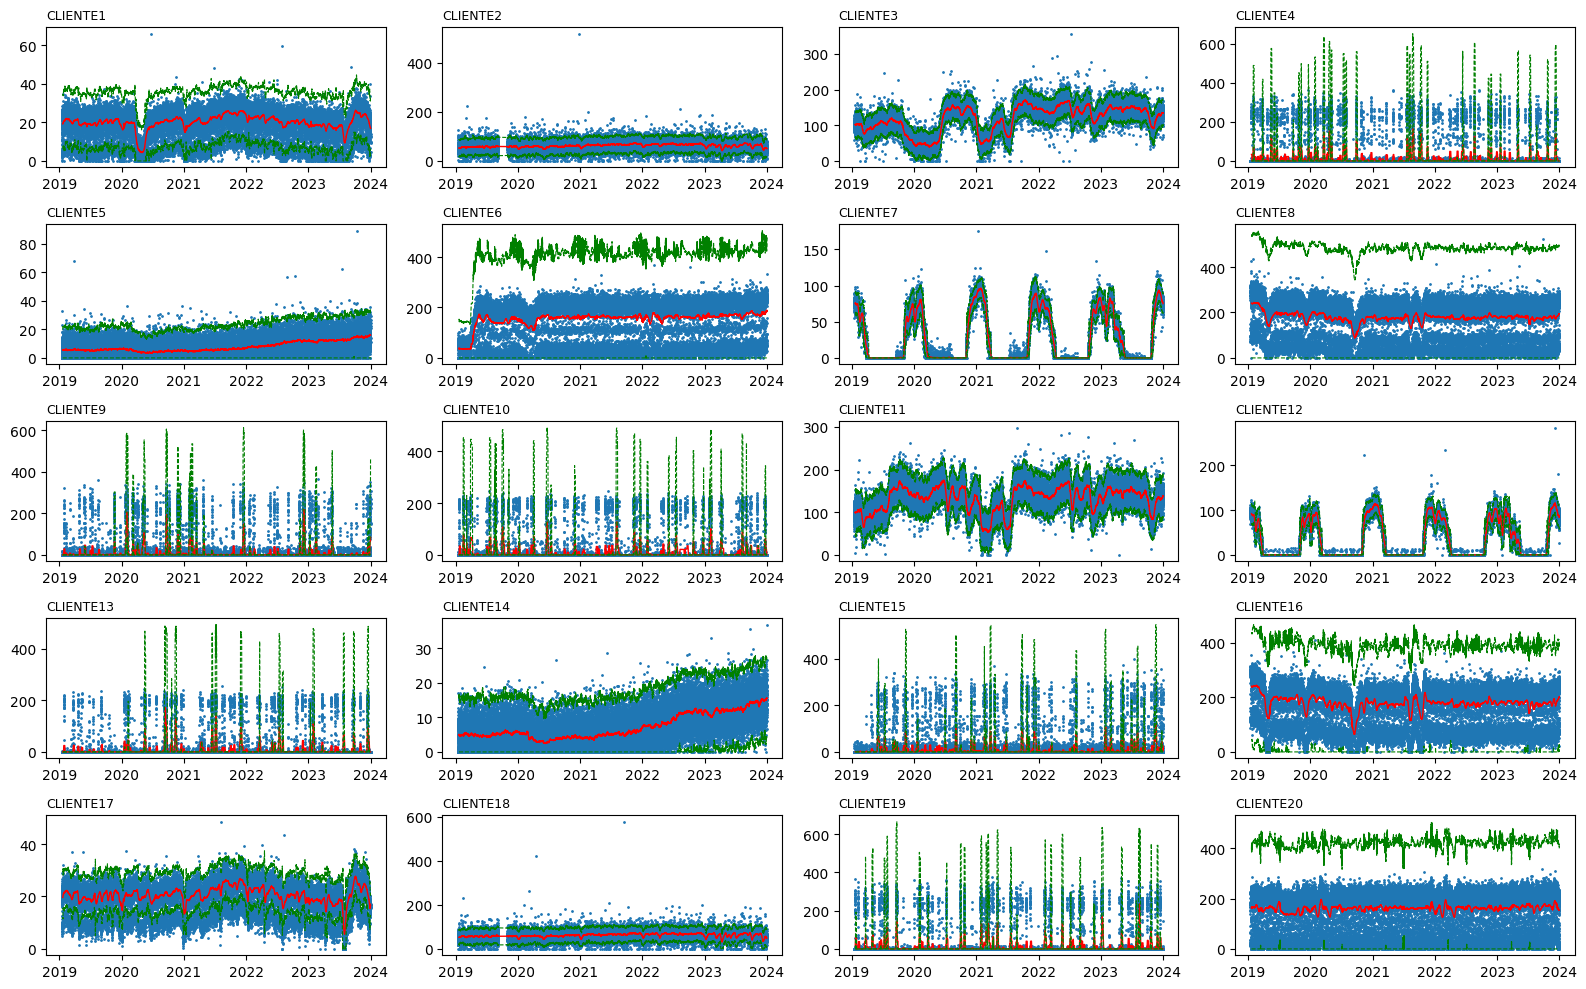

In [8]:
# Gráfica de comportamiento por clientes. 
# Promedio movil & Rangos Intercuartilicos IQR

# Lista de clientes únicos
clientes = data['Cliente'].unique()

ncols = 4
nrows = math.ceil(num_clientes / ncols)

# Crear subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 2), sharex=False)
axes = axes.flatten()

ventana = 168 # 7 días x 24 horas
k = 2

# Recorrer clientes y sus subplots
for i, cliente in enumerate(clientes):
    ax = axes[i]
    data_cliente = data[data['Cliente'] == cliente].sort_values('Fecha').copy()
    
    # Cálculo de rolling stats
    data_cliente['volumen_promedio'] = data_cliente['Volumen'].rolling(window=ventana).mean()
    
    # Cálculo de percentiles
    data_cliente['Q1'] = data_cliente['Volumen'].rolling(window=ventana).quantile(0.25)
    data_cliente['Q3'] = data_cliente['Volumen'].rolling(window=ventana).quantile(0.75)
    data_cliente['IQR'] = data_cliente['Q3'] - data_cliente['Q1']
    
    # Límites intercuartílicos
    data_cliente['IQR_inf'] = (data_cliente['Q1'] - 1.5 * data_cliente['IQR']).clip(lower=0)
    data_cliente['IQR_sup'] = data_cliente['Q3'] + 1.5 * data_cliente['IQR']

    # Graficar cada cliente
    ax.scatter(data_cliente['Fecha'], data_cliente['Volumen'], alpha=1, s=1)
    ax.plot(data_cliente['Fecha'], data_cliente['volumen_promedio'], color='red', linewidth=1,)
    ax.plot(data_cliente['Fecha'], data_cliente['IQR_sup'], color='green', linestyle='--', linewidth=0.8)
    ax.plot(data_cliente['Fecha'], data_cliente['IQR_inf'], color='green', linestyle='--', linewidth=0.8)
    
    ax.set_title(cliente, fontsize=9, loc='left')

# Apagar subplots vacíos 
for j in range(len(clientes), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

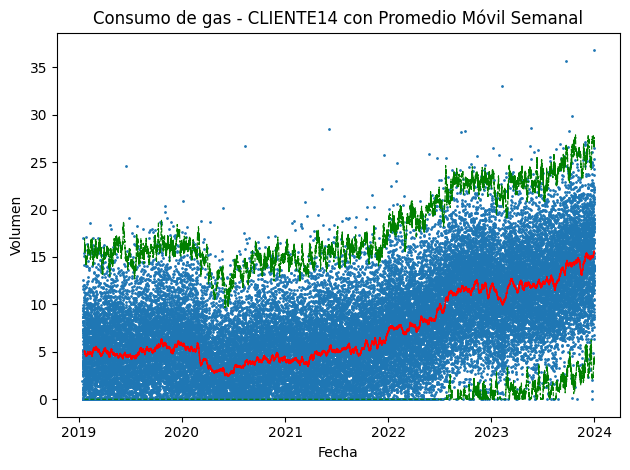

In [7]:
cliente = 'CLIENTE14' 

data_cliente = data[data['Cliente'] == cliente].sort_values('Fecha').copy()
    
# Cálculo de rolling stats
data_cliente['volumen_promedio'] = data_cliente['Volumen'].rolling(window=ventana).mean()

# Cálculo de percentiles
data_cliente['Q1'] = data_cliente['Volumen'].rolling(window=ventana).quantile(0.25)
data_cliente['Q3'] = data_cliente['Volumen'].rolling(window=ventana).quantile(0.75)
data_cliente['IQR'] = data_cliente['Q3'] - data_cliente['Q1']

# Límites intercuartílicos
data_cliente['IQR_inf'] = (data_cliente['Q1'] - 1.5 * data_cliente['IQR']).clip(lower=0)
data_cliente['IQR_sup'] = data_cliente['Q3'] + 1.5 * data_cliente['IQR']

# Graficar cada cliente
plt.scatter(data_cliente['Fecha'], data_cliente['Volumen'], alpha=1, s=1)
plt.plot(data_cliente['Fecha'], data_cliente['volumen_promedio'], color='red', linewidth=1,)
plt.plot(data_cliente['Fecha'], data_cliente['IQR_sup'], color='green', linestyle='--', linewidth=0.8)
plt.plot(data_cliente['Fecha'], data_cliente['IQR_inf'], color='green', linestyle='--', linewidth=0.8)

plt.title(f'Consumo de gas - {cliente} con Promedio Móvil Semanal')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.tight_layout()
plt.show()